In [2]:
# -*- coding: utf-8 -*-

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [3]:
# BeautifulSoup을 이용해 웹 크롤링하기
import requests
from bs4 import BeautifulSoup
import re

# 크롤링할 사이트 주소를 정의합니다.
source_url = "https://namu.wiki/RecentChanges"

# 사이트의 HTML구조에 기반하여 크롤링
req=requests.get(source_url)
html=req.content
soup=BeautifulSoup(html,'lxml')
contents_table=soup.find(name="table")
table_body=contents_table.find(name="tbody")
table_rows=table_body.find_all(name="tr")

In [4]:
# a 태그의 href 속성을 리스트로 추출하여 크롤링할 페이지 리스트를 생성
page_url_base="https://namu.wiki"
page_urls = []
for index in range(0,len(table_rows)):
    first_td=table_rows[index].find_all('td')[0]
    td_url=first_td.find_all('a')
    if len(td_url)>0:
        page_url=page_url_base+td_url[0].get('href')
        page_urls.append(page_url)
    
#중복된 urls를 제거합니다 -> set 함수를 이용
page_urls=list(set(page_urls))

In [5]:
for page in page_urls[:5]:
    print(page)

https://namu.wiki/w/%EC%95%BC%EA%B0%80%EB%AF%B8%20%EB%9D%BC%EC%9D%B4%ED%86%A0/%EB%93%9C%EB%9D%BC%EB%A7%88
https://namu.wiki/w/%EC%B4%88%EC%98%81%EC%99%95
https://namu.wiki/w/%EC%98%A4%ED%86%A0%EC%BD%94%EB%85%B8%EC%BD%94
https://namu.wiki/w/LIMBO
https://namu.wiki/w/%EC%82%AC%EB%83%A5%EA%BE%BC(%ED%95%98%EC%8A%A4%EC%8A%A4%ED%86%A4)/%EB%8D%B1%20%EC%9D%BC%EB%9E%8C/%EC%9A%A9%20%EC%82%AC%EB%83%A5%EA%BE%BC


In [6]:
# URL 페이지 정보를 기반으로 크롤링하기
req = requests.get(page_urls[0])
html = req.content
soup = BeautifulSoup(html, 'lxml')
contents_table = soup.find(name="article")
title = contents_table.find_all('h1')[0]
category = contents_table.find_all('ul')[0]
content_paragraphs = contents_table.find_all(name="div", attrs={"class":"wiki-paragraph"})
content_corpus_list = []

for paragraphs in content_paragraphs:
    content_corpus_list.append(paragraphs.text)
content_corpus = "".join(content_corpus_list)

print(title.text)
print("\n")
print(category.text)
print("\n")
print(content_corpus)

야가미 라이토/드라마 


야가미 라이토드라마 주인공드라마 빌런악역이 된 선역


드라마 데스노트의 주인공. 배우는 쿠보타 마사타카.김윤태?학교와 알바를 전전하는 지극히 평범한 대학생으로, 아마네 미사의 열성팬이다. 원작과 달리, 모친을 일찍 여의였다. 그리고 이 항목에서 서술하는 캐릭터는 원작 만화 및 애니메이션에서의 야가미 라이토와는 상당히 많이 달랐...는데, 가면 갈수록 원작의 라이토에 수렴하고 있, 아니, 결국에 그를 초월해서 타락해버렸다. 초반부에서의 그를 말하자면 소시민적인 성격을 가지고 있는 라이토가 L과 대항하면서 원작의 천재적인 두뇌가 아닌 일반인의 두뇌로 최고의 두뇌를 지닌 탐정인 L과 대결에서 몸부림치고 있다는 것이 정확하다. 작가가 오리지날 설정 만들기에 질린 듯팬이 좋아하는 가수랑 사귀게 된다1. 작중 행보1.1. 최후2. 기타이 문서에 스포일러가 포함되어 있습니다.이 문서가 설명하는 작품이나 인물 등에 대한 줄거리, 결말, 반전 요소 등을 직·간접적으로 포함하고 있습니다.1화에서는 친구인 카모다와 함께 미사의 콘서트를 보러 가고 음식점에서 아르바이트도 하는 평범한 인생을 보내며 음식점 주인이나 친구에게서는 "넌 하면 되잖아"라는 소리를 들을 정도지만 정작 자신은 "분에 넘치는 욕심은 부리면 큰일난다"며 무난하게 공무원이 되려고 한다.그러던 중, 고등학교 시절에 카모다를 괴롭히거나 돈을 갈취했던 사코타가 나타나 옛날처럼 카모다의 돈을 뜯으려 한다. 라이토는 그 것을 막으려 하지만, 오히려 핸드폰을 빼앗기고 만다. 그 후 길을 걷다가 우연히 데스노트를 줍게 되고, 영어를 몰라 사전을 뒤적인 끝에[1] 사용설명을 알게 되는 순간 사코타의 이름을 적는다. 그러다 곧 사코타의 이름을 지우려 했으나 지워지지 않아 불안해하고, 결국 시간이 지나도 아무 일이 없자 안심한다. 하지만 다음 날 아침 경찰이 폰을 돌려주러 오게 되자 사코타가 죽었다는 것을 알게 된다. 그 후 상황 확인을 위해 장례식장에 가게 되고, 그 곳에서 사코타의 친구들에게 사코타가

In [7]:
# 크롤링한 데이터를 데이터 프레임으로 만들기 위해 준비합니다.
columns = ['title', 'category', 'content_text']
df = pd.DataFrame(columns=columns)

# 각 페이지별 '제목', '카테고리', '본문' 정보를 데이터 프레임으로 만듭니다.
for page_url in page_urls:

    # 사이트의 html 구조에 기반하여 크롤링을 수행합니다.
    req = requests.get(page_url)
    html = req.content
    soup = BeautifulSoup(html, 'lxml')
    contents_table = soup.find(name="article")
    title = contents_table.find_all('h1')[0]
    category = contents_table.find_all('ul')[0]
    content_paragraphs = contents_table.find_all(name="div", attrs={"class":"wiki-paragraph"})
    content_corpus_list = []
    
    # 페이지 내 제목 정보에서 개행 문자를 제거한 뒤 추출합니다. 만약 없는 경우, 빈 문자열로 대체합니다.
    if title is not None:
        row_title = title.text.replace("\n", " ")
    else:
        row_title = ""
    
    # 페이지 내 본문 정보에서 개행 문자를 제거한 뒤 추출합니다. 만약 없는 경우, 빈 문자열로 대체합니다.
    if content_paragraphs is not None:
        for paragraphs in content_paragraphs:
            if paragraphs is not None:
                content_corpus_list.append(paragraphs.text.replace("\n", " "))
            else:
                content_corpus_list.append("")
    else:
        content_corpus_list.append("")
        
    # 페이지 내 카테고리정보에서 “분류”라는 단어와 개행 문자를 제거한 뒤 추출합니다. 만약 없는 경우, 빈 문자열로 대체합니다.
    if category is not None:
        row_category = category.text.replace("\n", " ")
    else:
        row_category = ""
    
    # 모든 정보를 하나의 데이터 프레임에 저장합니다.
    row = [row_title, row_category, "".join(content_corpus_list)]
    series = pd.Series(row, index=df.columns)
    df = df.append(series, ignore_index=True)

In [8]:
df.head(5)

,title,category,content_text
0,야가미 라이토/드라마,야가미 라이토드라마 주인공드라마 빌런악역이 된 선역,드라마 데스노트의 주인공. 배우는 쿠보타 마사타카.김윤태?학교와 알바를 전전하는 지...
1,초영왕,초나라의 군주기원전 529년 사망초나라의 영윤친족살해자자살한 인물,초 군주 [ 펼치기 · 접기 ]초대 국군제2대 국군제3대 국군제4대 국군웅광웅역웅애...
2,오토코노코,오토코노코,1. 개요2. 정의3. 번역4. 이 클리셰가 인기를 끌게 된 배경5. 특징5.1. ...
3,LIMBO,액션 어드벤처 게임인디 게임호러 게임PC 게임Xbox One 게임Xbox 360 게...,LIMBO림보개발플레이데드유통플레이데드마이크로소프트 게임 스튜디오[1]장르퍼즐-플랫...
4,사냥꾼(하스스톤)/덱 일람/용 사냥꾼,나무위키 하스스톤 프로젝트하스스톤/직업,"하스스톤 덱 일람전사주술사도적성기사사냥꾼(방밀)(어그로, 컨트롤)(주문)(어그로, ..."


In [9]:
# 텍스트 전처리 작업
# 특수문자나 외국어를 제거하는 과정
# 're' 라는 모듈을 통해 정규 표현식을 사용할 수 있다
# 텍스트 정제 함수 : 한글 이외의 문자는 전부 제거
def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') # 한글의 정규표현식을 나타냅니다.
    result=hangul.sub('',text)
    return result
print(text_cleaning(df['content_text'][0]))

드라마 데스노트의 주인공 배우는 쿠보타 마사타카김윤태학교와 알바를 전전하는 지극히 평범한 대학생으로 아마네 미사의 열성팬이다 원작과 달리 모친을 일찍 여의였다 그리고 이 항목에서 서술하는 캐릭터는 원작 만화 및 애니메이션에서의 야가미 라이토와는 상당히 많이 달랐는데 가면 갈수록 원작의 라이토에 수렴하고 있 아니 결국에 그를 초월해서 타락해버렸다 초반부에서의 그를 말하자면 소시민적인 성격을 가지고 있는 라이토가 과 대항하면서 원작의 천재적인 두뇌가 아닌 일반인의 두뇌로 최고의 두뇌를 지닌 탐정인 과 대결에서 몸부림치고 있다는 것이 정확하다 작가가 오리지날 설정 만들기에 질린 듯팬이 좋아하는 가수랑 사귀게 된다 작중 행보 최후 기타이 문서에 스포일러가 포함되어 있습니다이 문서가 설명하는 작품이나 인물 등에 대한 줄거리 결말 반전 요소 등을 직간접적으로 포함하고 있습니다화에서는 친구인 카모다와 함께 미사의 콘서트를 보러 가고 음식점에서 아르바이트도 하는 평범한 인생을 보내며 음식점 주인이나 친구에게서는 넌 하면 되잖아라는 소리를 들을 정도지만 정작 자신은 분에 넘치는 욕심은 부리면 큰일난다며 무난하게 공무원이 되려고 한다그러던 중 고등학교 시절에 카모다를 괴롭히거나 돈을 갈취했던 사코타가 나타나 옛날처럼 카모다의 돈을 뜯으려 한다 라이토는 그 것을 막으려 하지만 오히려 핸드폰을 빼앗기고 만다 그 후 길을 걷다가 우연히 데스노트를 줍게 되고 영어를 몰라 사전을 뒤적인 끝에 사용설명을 알게 되는 순간 사코타의 이름을 적는다 그러다 곧 사코타의 이름을 지우려 했으나 지워지지 않아 불안해하고 결국 시간이 지나도 아무 일이 없자 안심한다 하지만 다음 날 아침 경찰이 폰을 돌려주러 오게 되자 사코타가 죽었다는 것을 알게 된다 그 후 상황 확인을 위해 장례식장에 가게 되고 그 곳에서 사코타의 친구들에게 사코타가 심장마비에 의해 사망한 것을 듣게 되고 쇼크 먹는다 하지만 사코타의 친구들이 되려 그가 죽자 기뻐한다는 것을 알게되고 의문을 가지게 된다 한편 아직 데스노트의 힘을 믿지

In [10]:
# 모든 데이터에 전처리를 적용하기 위해서 apply() 함수를 사용
# 각 피처마다 데이터 처리를 적용합니다.
df['title']=df['title'].apply(lambda x: text_cleaning(x))
df['category']=df['category'].apply(lambda x: text_cleaning(x))
df['content_text']=df['content_text'].apply(lambda x: text_cleaning(x))
df.head(5)

,title,category,content_text
0,야가미 라이토드라마,야가미 라이토드라마 주인공드라마 빌런악역이 된 선역,드라마 데스노트의 주인공 배우는 쿠보타 마사타카김윤태학교와 알바를 전전하는 지극히 ...
1,초영왕,초나라의 군주기원전 년 사망초나라의 영윤친족살해자자살한 인물,초 군주 펼치기 접기 초대 국군제대 국군제대 국군제대 국군웅광웅역웅애웅달제대 국...
2,오토코노코,오토코노코,개요 정의 번역 이 클리셰가 인기를 끌게 된 배경 특징 용모체형 성격 갖가지 클리...
3,,액션 어드벤처 게임인디 게임호러 게임 게임 게임 게임 게임 게임 게임 게...,림보개발플레이데드유통플레이데드마이크로소프트 게임 스튜디오장르퍼즐플랫포머 어드벤처게임...
4,사냥꾼하스스톤덱 일람용 사냥꾼,나무위키 하스스톤 프로젝트하스스톤직업,하스스톤 덱 일람전사주술사도적성기사사냥꾼방밀어그로 컨트롤주문어그로 멀록 미드레인지 ...


In [11]:
# 키워드 추출
# 명사 또는 형태소 단위의 문자열을 추출 -> 말뭉치 만들기
# 말뭉치 : 텍스트 데이터 뭉텅이
# tolist()로 추출한 뒤 join 함수로 말뭉치를 생성
# 각 피처마다 말뭉치를 생성합니다.
title_corpus="".join(df['title'].tolist())
catrgory_corpus="".join(df['category'].tolist())
content_corpus="".join(df['content_text'].tolist())
print(title_corpus)

야가미 라이토드라마 초영왕 오토코노코  사냥꾼하스스톤덱 일람용 사냥꾼 나폴레옹 시리즈 이홍기 위험한 약속 박지성선수 경력 김가면 운전교실차량 목록 열혈초등학교등장인물  트윈스선수단 진레이 나무위키연습장 왓치맨드라마 티파니 영 록 리 구은재 최재성야구선수  미션 일람스토리 미션피날레 반도영화등장인물 스타벅스한국서울 틀 폴리리듬 나타얼티밋 스쿨 충신 아이언맨아머 이달의 소녀    반도영화 가마돈 사건반장 사쿠라이 히로아키 은하클로저스스킬 포켓몬스터스토리 진행 시 팁호연지방 기독교복음침례회  우리은행    주차라운드 롤스로이스 고스트 파일  나이츠 어웨이  여성향 게임 세계는 모브에게 가혹한 세계입니다등장인물 마을 주민스매시브라더스 시리즈 삼성 라이온즈년월 우디르 초관심 시리즈 모노노케 히메등장인물     멜리오다스 슈퍼히어로 영화 파일  나이츠 홈  함대 컬렉션이벤트  시리즈 코오리토라 이찬혁야구선수 노벨상 순천방송국 송성문 팬텀메이플스토리스킬 지당하신 말씀 디시인사이드문제점   우리은행    라운드 결산 유영혁 다이치 아키타로  제레미 스티븐스 지전  등장인물 레드진셍 출신대학별 연예인 왕과 나드라마 서울  나이츠유니폼 리그 오브 레전드패러디 아르노 스타크 한선태 은하클로저스 등 미디어등장인물 마녀의 샘 시리즈사건사고 이호성 칼바니아 이야기   책장쥐 


In [12]:
from konlpy.tag import Okt
from collections import Counter

# konlpy의 형태소 분석기로 명사 단위의 키워드를 추출합니다.
nouns_tagger = Okt()
nouns = nouns_tagger.nouns(content_corpus)
count = Counter(nouns)

In [13]:
count

Counter({'드라마': 163,
         '데스노트': 24,
         '주인공': 135,
         '쿠보타': 2,
         '마사': 8,
         '타카': 81,
         '김윤태': 1,
         '학교': 120,
         '알바': 20,
         '전전': 5,
         '대학생': 6,
         '아마': 37,
         '미사': 29,
         '팬': 217,
         '원작': 72,
         '달리': 167,
         '모친': 4,
         '일찍': 14,
         '여의': 1,
         '이': 1276,
         '항목': 60,
         '서술': 28,
         '캐릭터': 310,
         '만화': 47,
         '및': 188,
         '애니메이션': 31,
         '가미': 35,
         '라이토': 76,
         '가면': 64,
         '갈수록': 13,
         '수렴': 3,
         '그': 1374,
         '초월': 26,
         '초반': 191,
         '부': 169,
         '말': 1317,
         '소시민': 3,
         '성격': 86,
         '가지': 266,
         '과': 39,
         '대항': 6,
         '천재': 22,
         '두뇌': 5,
         '일반인': 12,
         '최고': 67,
         '탐정': 3,
         '대결': 120,
         '몸부림': 1,
         '것': 2317,
         '작가': 72,
         '오리': 39,
         '설정': 78

In [14]:
# 한글자 키워드를 제거합니다.
remove_char_counter = Counter({x : count[x] for x in count if len(x) > 1})
print(remove_char_counter)

Counter({'자신': 1113, '스킬': 962, '때문': 941, '공격': 927, '은동': 790, '사실': 722, '이후': 663, '호선': 661, '시즌': 647, '추가': 632, '사람': 623, '사용': 602, '경우': 588, '태인': 584, '서울특별시': 560, '정도': 541, '모습': 514, '바람': 501, '문서': 475, '방문': 434, '다른': 433, '최준혁': 427, '대한': 422, '경기': 420, '위키러': 405, '위해': 399, '생각': 393, '문단': 370, '이전': 364, '다스': 356, '레벨': 356, '등장': 351, '시간': 347, '다시': 345, '모든': 345, '혜원': 342, '가장': 325, '하나': 319, '매장': 315, '캐릭터': 310, '게임': 302, '역사': 300, '모두': 297, '본인': 296, '이름': 294, '보스': 292, '증가': 289, '내용': 285, '인물': 282, '매우': 282, '효과': 282, '시작': 281, '문제': 281, '리그': 281, '닌자': 278, '니코': 276, '상태': 274, '또한': 273, '가지': 266, '이상': 263, '선수': 263, '우디르': 260, '당시': 259, '기술': 259, '상황': 258, '준혁': 257, '상대': 255, '시리즈': 254, '아버지': 253, '투수': 251, '회장': 250, '아들': 249, '대해': 248, '서울': 246, '은찬': 243, '팬텀': 241, '한국': 236, '바로': 235, '다만': 233, '영국': 232, '데미지': 230, '박지성': 229, '마스터': 228, '현재': 227, '티어': 227, '보고': 223, '능력': 222, '아이': 221, '부분': 220,

In [16]:
# 한국어 약식 불용어사전 예시 파일입니다. 출처 - (https://www.ranks.nl/stopwords/korean)
korean_stopwords_path = "data/korean_stopwords.txt"

# 텍스트 파일을 오픈합니다.
with open(korean_stopwords_path, encoding='utf8') as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]
print(stopwords[:10])

['아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라']


In [17]:
# 나무위키 페이지에 맞는 불용어를 추가합니다.
namu_wiki_stopwords = ['상위', '문서', '내용', '누설', '아래', '해당', '설명', '표기', '추가', '모든', '사용', '매우', '가장',
                       '줄거리', '요소', '상황', '편집', '틀', '경우', '때문', '모습', '정도', '이후', '사실', '생각', '인물', 
                       '이름', '년월']
for stopword in namu_wiki_stopwords:
    stopwords.append(stopword)

In [18]:
# 키워드 데이터에서 불용어를 제거합니다.
remove_char_counter = Counter({x : remove_char_counter[x] for x in count if x not in stopwords})
print(remove_char_counter)

Counter({'스킬': 962, '공격': 927, '은동': 790, '호선': 661, '시즌': 647, '사람': 623, '태인': 584, '서울특별시': 560, '바람': 501, '방문': 434, '최준혁': 427, '대한': 422, '경기': 420, '위키러': 405, '위해': 399, '문단': 370, '이전': 364, '다스': 356, '레벨': 356, '등장': 351, '다시': 345, '혜원': 342, '매장': 315, '캐릭터': 310, '게임': 302, '역사': 300, '본인': 296, '보스': 292, '증가': 289, '효과': 282, '시작': 281, '문제': 281, '리그': 281, '닌자': 278, '니코': 276, '상태': 274, '가지': 266, '선수': 263, '우디르': 260, '당시': 259, '기술': 259, '준혁': 257, '상대': 255, '시리즈': 254, '아버지': 253, '투수': 251, '회장': 250, '아들': 249, '대해': 248, '서울': 246, '은찬': 243, '팬텀': 241, '한국': 236, '영국': 232, '데미지': 230, '박지성': 229, '마스터': 228, '현재': 227, '티어': 227, '보고': 223, '능력': 222, '부분': 220, '영화': 219, '사건': 217, '결혼': 217, '한지훈': 217, '출연': 216, '지훈': 216, '사이': 211, '이유': 208, '병원': 208, '관련': 206, '피해': 204, '이용': 202, '자리': 200, '방송': 199, '그녀': 198, '기록': 195, '친구': 192, '계속': 192, '기준': 192, '초반': 191, '역시': 191, '다년': 191, '대학': 191, '처음': 187, '한광훈': 186, '신흥': 186, '영상': 184

In [25]:
import random
import pytagcloud
import webbrowser

# 가장 출현 빈도수가 높은 40개의 단어를 선정합니다.
ranked_tags = remove_char_counter.most_common(40)

# pytagcloud로 출력할 40개의 단어를 입력합니다. 단어 출력의 최대 크기는 80으로 제한합니다.
taglist = pytagcloud.make_tags(ranked_tags, maxsize=80)

# pytagcloud 이미지를 생성합니다. 폰트는 나눔 고딕을 사용합니다.
pytagcloud.create_tag_image(taglist, 'wordcloud.jpg', size=(900, 600), fontname='Neuton', rectangular=False)

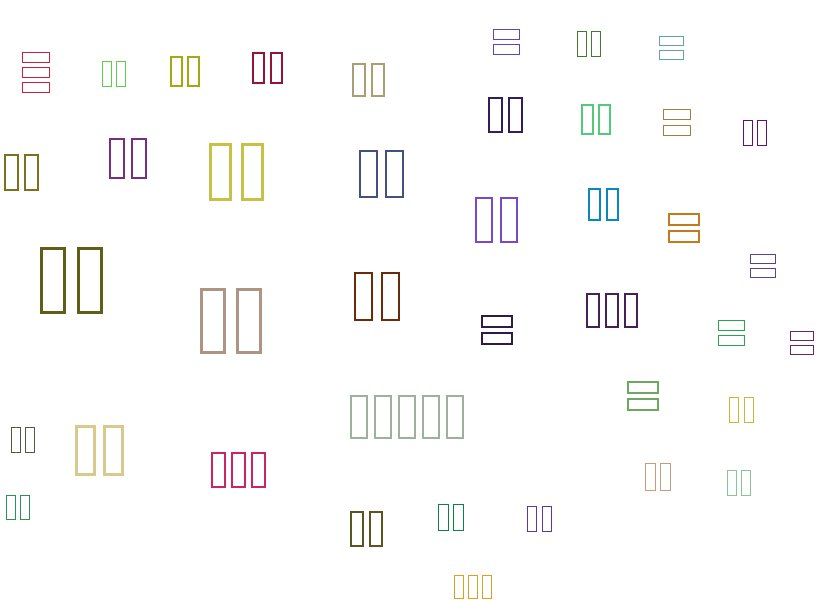

In [26]:
# 생성한 이미지를 주피터 노트북상에서 출력합니다.
from IPython.display import Image
Image(filename='wordcloud.jpg')